In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
sample_solution = pd.read_csv('datasets/sample_solution.csv')

In [3]:
sample_solution.head()

,id,claim
0,957919,0.5
1,957920,0.5
2,957921,0.5
3,957922,0.5
4,957923,0.5


In [6]:
X_train = train.drop(columns=['id', 'claim'])
X_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,...,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770
1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,...,0.97673,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359
2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,...,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690
3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,...,-0.01182,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486
4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,144.120,...,0.92739,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049


In [7]:
y_train = train[['claim']]
y_train.head()

,claim
0,1
1,0
2,1
3,1
4,1


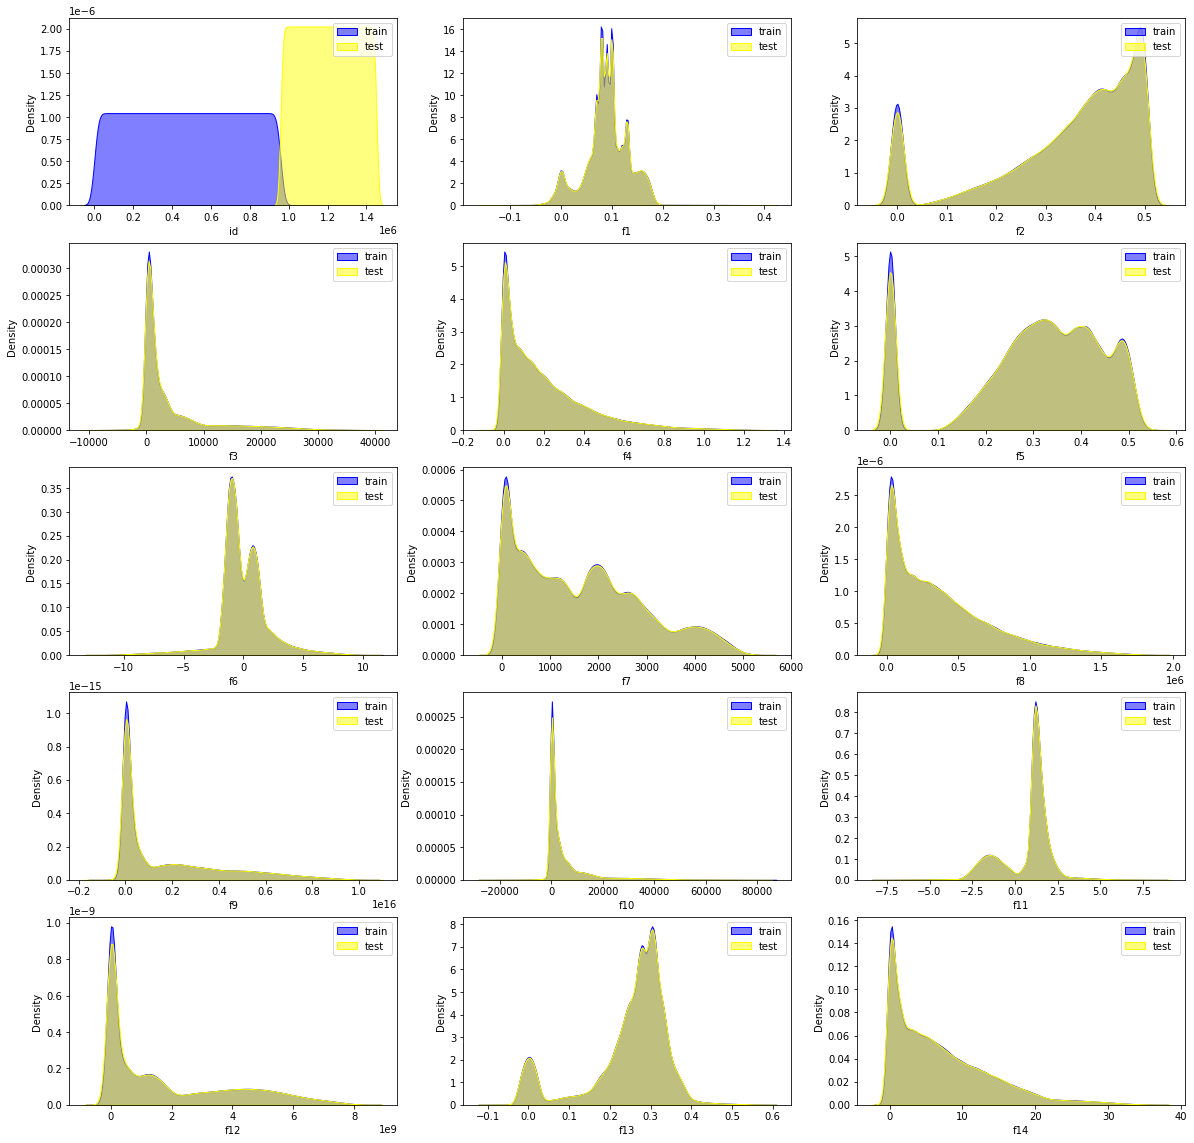

In [9]:
fig,ax = plt.subplots(5, 3, figsize=(20,20))

i = 1
for feature in train.columns[:15]:
    plt.subplot(5,3,i)
    ax = sns.kdeplot(train[feature], shade=True, color='blue',  alpha=0.5, label='train')
    ax = sns.kdeplot(test[feature], shade=True, color='yellow',  alpha=0.5, label='test')
    plt.xlabel(feature)
    plt.legend()
    i += 1
plt.show()

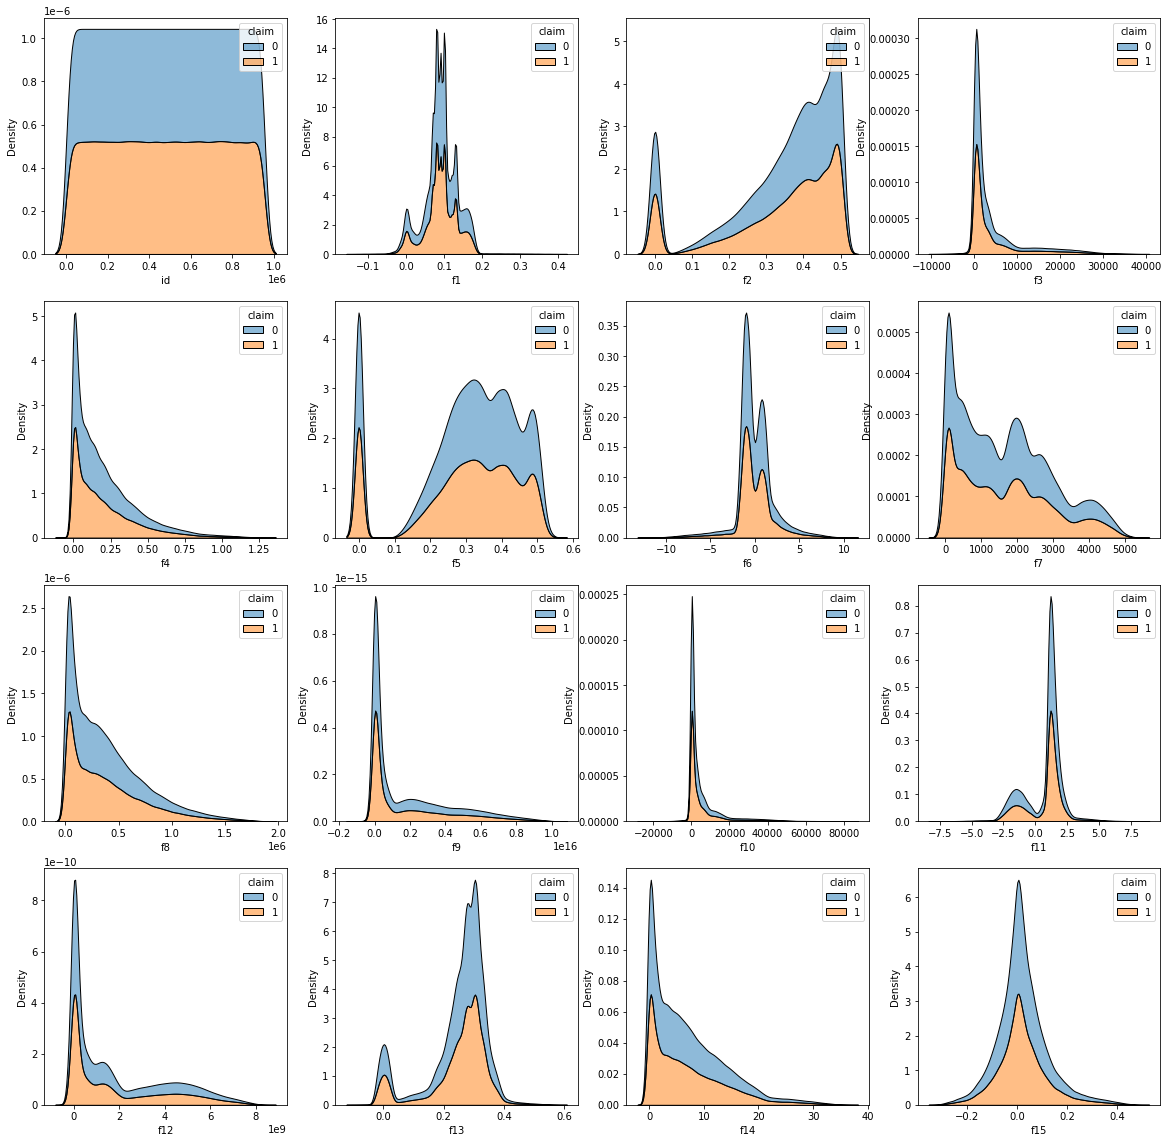

In [10]:
i =1
fig, ax = plt.subplots(4,4,figsize=(20,20))
for feature in train.columns[:16]:
    plt.subplot(4,4,i)
    ax = sns.kdeplot(train[feature], hue=train['claim'], shade=True, multiple="stack", alpha=0.5)
    plt.xlabel(feature)
    i += 1
plt.show()

In [18]:
X_train.isnull().sum()

f1      15247
f2      15190
f3      15491
f4      15560
f5      15405
        ...  
f114    15438
f115    15559
f116    15589
f117    15407
f118    15212
Length: 118, dtype: int64

In [12]:
test.isnull().sum()

id         0
f1      7812
f2      7891
f3      7795
f4      7733
        ... 
f114    7942
f115    7977
f116    8083
f117    7763
f118    7885
Length: 119, dtype: int64

In [52]:
test.columns

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117',
       'f118'],
      dtype='object', length=119)

In [53]:
nan_colname = []
for col in test.columns:
    if test[col].isnull().sum()>0:
        nan_colname.append(col)
nan_colname

['f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f54',
 'f55',
 'f56',
 'f57',
 'f58',
 'f59',
 'f60',
 'f61',
 'f62',
 'f63',
 'f64',
 'f65',
 'f66',
 'f67',
 'f68',
 'f69',
 'f70',
 'f71',
 'f72',
 'f73',
 'f74',
 'f75',
 'f76',
 'f77',
 'f78',
 'f79',
 'f80',
 'f81',
 'f82',
 'f83',
 'f84',
 'f85',
 'f86',
 'f87',
 'f88',
 'f89',
 'f90',
 'f91',
 'f92',
 'f93',
 'f94',
 'f95',
 'f96',
 'f97',
 'f98',
 'f99',
 'f100',
 'f101',
 'f102',
 'f103',
 'f104',
 'f105',
 'f106',
 'f107',
 'f108',
 'f109',
 'f110',
 'f111',
 'f112',
 'f113',
 'f114',
 'f115',
 'f116',
 'f117',
 'f118']

In [24]:
test['id'].isnull().sum()

0

In [54]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
for nan_col in nan_colname:
    imp.fit(X_train[[nan_col]])
    X_train[nan_col] = imp.transform(X_train[[nan_col]])
X_train.isnull().sum()

f1      0
f2      0
f3      0
f4      0
f5      0
       ..
f114    0
f115    0
f116    0
f117    0
f118    0
Length: 118, dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)

In [15]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [16]:
model_lgb = LGBMClassifier(num_iterations=100, objective='binary', earning_rate=0.1)

In [17]:
def score(X, y, model_lgb, cv):
    scoring = ["roc_auc"]
    scores = cross_validate(
        model_lgb, X, y, scoring=scoring, cv=cv, return_train_score=True
    )
    scores = pd.DataFrame(scores).T
    return scores.assign(
        mean = lambda x: x.iloc[:,:3].mean(axis=1),
        std = lambda x: x.iloc[:,:3].std(axis=1),
    )

scores = score(X, y, model_lgb, cv=3)
display(scores)

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


,0,1,2,mean,std
fit_time,35.702115,32.560664,37.560418,35.274399,2.527171
score_time,2.006708,1.868687,2.137738,2.004378,0.134541
test_roc_auc,0.764356,0.760069,0.762194,0.762206,0.002144
train_roc_auc,0.774026,0.773676,0.773173,0.773625,0.000429


In [47]:
#練習
sample_df = pd.DataFrame({'a': [1,2,3], 'b':[11,22,33]})
sample_df.assign(mean = lambda x: x.sum(axis=1))

,a,b,mean
0,1,11,12
1,2,22,24
2,3,33,36


In [53]:
#練習
sample_df = pd.DataFrame({'a': [1,10], 'b':[2,20], 'c':[3,30]})
sample_df.assign(total = lambda x: x.sum(axis=1),
                 std = lambda x: x.std(axis=1),
                 mean = lambda x: x.mean(axis=1))

,a,b,c,total,std,mean
0,1,2,3,6,2.160247,2.832049
1,10,20,30,60,21.602469,28.320494


In [66]:
#練習
sample_df = pd.DataFrame({'a': [1,10], 'b':[2,20], 'c':[3,30]})
sample_df['total'] = sample_df.apply(lambda row: row.loc['a':'c'].sum(), axis=1)
sample_df['std'] = sample_df.apply(lambda row: row.loc['a':'c'].std(), axis=1)
sample_df['mean'] = sample_df.apply(lambda row: row.loc['a':'c'].mean(), axis=1)
sample_df

,a,b,c,total,std,mean
0,1,2,3,6,1.0,2.0
1,10,20,30,60,10.0,20.0


In [19]:
X_test = test.drop(columns=['id'])
X_test.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,0.165850,0.487050,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,6221.000,...,0.16253,-22.1890,2.0655,0.430880,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357
1,0.129650,0.373480,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,934.430,...,0.81528,-1.6342,1.5736,-1.071200,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125
2,0.120190,0.445210,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,131.810,...,0.81831,-32.7800,2.1364,-1.931200,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797
3,0.054008,0.395960,996.14,0.85934,0.36678,-0.17060,386.56,325680.0,-3.432200e+13,-26.473,...,0.86559,-2.4162,1.5199,-0.011633,1.3840,26849.0,1.1490,2.138800e+17,6173.3,0.32910
4,0.079947,-0.006919,10574.00,0.34845,0.45008,-1.84200,3027.00,428150.0,9.291500e+11,5999.400,...,0.25190,-18.6300,3.7387,0.757080,-4.9405,50336.0,1.2488,2.151300e+17,2250.1,0.33796


In [20]:
X_test = X_test.fillna(X_test.mean())

In [22]:
X_test.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
count,493474.000000,493474.000000,493474.000000,493474.000000,493474.000000,493474.000000,493474.000000,4.934740e+05,4.934740e+05,493474.000000,...,493474.000000,493474.000000,493474.000000,493474.000000,493474.000000,493474.000000,493474.000000,4.934740e+05,493474.000000,493474.000000
mean,0.090191,0.346143,4047.202400,0.201503,0.304879,-0.071511,1617.036351,3.767998e+05,1.808500e+15,5331.081920,...,0.398130,-19.840970,2.075146,23.846392,1.762625,63051.287541,1.209049,4.284258e+16,3968.585512,0.558734
std,0.043192,0.144718,6332.608919,0.210881,0.144270,2.107967,1262.497302,3.422576e+05,2.319129e+15,9992.737353,...,0.295542,18.366679,0.888514,45.173001,10.017225,91533.446201,0.114140,6.688505e+16,3136.309140,0.405196
min,-0.153190,-0.019060,-9436.300000,-0.080716,-0.007007,-12.841000,-215.660000,-2.780900e+04,-1.254900e+15,-26331.000000,...,-0.042181,-104.740000,0.261040,-23.938000,-26.311000,-81381.000000,0.900700,-7.749400e+15,-416.240000,-0.186960
25%,0.070500,0.286282,428.430000,0.036287,0.242430,-1.108800,494.622500,9.375525e+04,1.253525e+13,80.565250,...,0.117770,-28.302000,1.491300,-0.587058,-4.371800,2634.225000,1.147400,2.449225e+14,1340.000000,0.280470
50%,0.090191,0.386530,1320.700000,0.141040,0.325490,-0.342125,1484.100000,2.966200e+05,5.486850e+14,1150.400000,...,0.375245,-14.906000,1.669500,1.821400,1.069500,20403.000000,1.178300,1.406450e+16,3304.000000,0.480410
75%,0.115470,0.457340,4301.875000,0.293617,0.411490,0.905290,2468.800000,5.537200e+05,3.054375e+15,5563.150000,...,0.616270,-5.436325,2.480400,20.926750,6.724375,86177.500000,1.240500,5.182500e+16,6108.000000,0.738800
max,0.412900,0.519880,39841.000000,1.310200,0.555580,11.046000,5413.100000,1.906700e+06,1.048900e+16,83838.000000,...,1.109400,1.464200,4.570500,217.340000,47.314000,521540.000000,1.877900,3.239500e+17,13198.000000,2.732000


In [24]:
X_test = mms.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
count,493474.000000,493474.000000,493474.000000,493474.000000,493474.000000,493474.000000,493474.000000,4.934740e+05,4.934740e+05,4.934740e+05,...,493474.000000,493474.000000,493474.000000,493474.000000,493474.000000,4.934740e+05,493474.000000,4.934740e+05,493474.000000,493474.000000
mean,1.017215,1.296919,0.192420,0.202863,1.000771,0.555209,0.039835,1.535505e-02,9.961735e-02,2.356978e-01,...,0.360344,0.992435,0.033158,0.113635,0.362768,1.348250e-01,-0.607016,2.678490e-02,0.030632,0.136966
std,0.135264,0.499922,0.000003,0.107282,0.457198,0.003662,0.000040,9.060765e-08,4.879746e-13,7.962452e-07,...,0.217398,0.001590,0.048304,0.000749,0.001812,2.475906e-07,0.118500,2.010827e-13,0.000017,0.048352
min,0.255018,0.035340,0.192414,0.059289,0.012389,0.533027,0.039778,1.535495e-02,9.961735e-02,2.356953e-01,...,0.036454,0.985085,-0.065465,0.112842,0.357689,1.348246e-01,-0.927144,2.678490e-02,0.030608,0.047982
25%,0.955548,1.090135,0.192418,0.118813,0.802868,0.553407,0.039800,1.535498e-02,9.961735e-02,2.356974e-01,...,0.154113,0.991703,0.001418,0.113230,0.361658,1.348248e-01,-0.671019,2.678490e-02,0.030618,0.103761
50%,1.017215,1.436436,0.192419,0.172104,1.066089,0.554739,0.039831,1.535503e-02,9.961735e-02,2.356975e-01,...,0.343509,0.992862,0.011105,0.113270,0.362643,1.348249e-01,-0.638939,2.678490e-02,0.030629,0.127620
75%,1.096380,1.681046,0.192420,0.249725,1.338628,0.556906,0.039862,1.535510e-02,9.961735e-02,2.356978e-01,...,0.520805,0.993682,0.055190,0.113587,0.363666,1.348251e-01,-0.574363,2.678490e-02,0.030644,0.158453
max,2.027842,1.897089,0.192435,0.766895,1.795257,0.574522,0.039954,1.535546e-02,9.961735e-02,2.357041e-01,...,0.883547,0.994280,0.168817,0.116845,0.371009,1.348262e-01,0.087386,2.678490e-02,0.030682,0.396303


In [35]:
model_lgb.fit(X, y)
y_pred = model_lgb.predict_proba(X_test)

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [36]:
y_pred

array([[0.74807303, 0.25192697],
       [0.72812224, 0.27187776],
       [0.74450189, 0.25549811],
       ...,
       [0.74529511, 0.25470489],
       [0.74318662, 0.25681338],
       [0.71472331, 0.28527669]])

In [38]:
submission= sample_solution.copy()

In [39]:
submission['claim'] = y_pred
submission = submission.set_index('id')
submission

,claim
id,
957919,0.748073
957920,0.728122
957921,0.744502
957922,0.744936
957923,0.724783
...,...
1451388,0.719619
1451389,0.737751
1451390,0.745295


In [40]:
submission.describe()

,claim
count,493474.000000
mean,0.728566
std,0.022657
min,0.470976
25%,0.723603
50%,0.732822
75%,0.740758
max,0.773297


In [41]:
submission.to_csv('submission.csv')

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_scaled, y, test_size=0.2, random_state=0)

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_train)

PCA(n_components=5)

In [109]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [110]:
X_train = X_train[:, :10]

In [111]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [112]:
y_pred = clf.predict(X_test[:, :10])

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred)

0.5042696676131618